# Import necessary libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read mat2.csv file and turning it into a Pandas DataFrame

In [2]:
df = pd.read_csv('/kaggle/input/student-performance-prediction/mat2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   address     395 non-null    object
 5   famsize     395 non-null    object
 6   Pstatus     395 non-null    object
 7   Medu        395 non-null    int64 
 8   Fedu        395 non-null    int64 
 9   Mjob        395 non-null    object
 10  Fjob        395 non-null    object
 11  reason      395 non-null    object
 12  guardian    395 non-null    object
 13  traveltime  395 non-null    int64 
 14  studytime   395 non-null    int64 
 15  failures    395 non-null    int64 
 16  schoolsup   395 non-null    object
 17  famsup      395 non-null    object
 18  paid        395 non-null    object
 19  activities  395 non-null    object
 20  nursery   

# Copy mat2.csv DataFrame into features variable (X)

In [3]:
X = df.iloc[:,:]
X.head()

,Unnamed: 0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,GP,F,18,U,GT3,A,4,4,at_home,...,4,3,4,1,1,3,6,5,6,6
1,1,GP,F,17,U,GT3,T,1,1,at_home,...,5,3,3,1,1,3,4,5,5,6
2,2,GP,F,15,U,LE3,T,1,1,at_home,...,4,3,2,2,3,3,10,7,8,10
3,3,GP,F,15,U,GT3,T,4,2,health,...,3,2,2,1,1,5,2,15,14,15
4,4,GP,F,16,U,GT3,T,3,3,other,...,4,3,2,1,2,5,4,6,10,10


# We will predict the value of G3, so we will assign column G3 from the DataFrame into target/label variable (y)

In [4]:
 y = pd.DataFrame(df.G3)
 y.column = ['G3']
 y.head()

/tmp/ipykernel_20/3219056717.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  y.column = ['G3']


,G3
0,6
1,6
2,10
3,15
4,10


# Drop index column (Unnamed: 0) and label column (G3) from features variable

In [5]:
X.drop(['Unnamed: 0', 'G3'], axis=1, inplace=True)

# There is multiple categorical features with non-numerical values. We will turn them into numeric values with *LabelEncoder*

In [6]:
from sklearn.preprocessing import LabelEncoder
LA = LabelEncoder()

# Identify categorical features, and put them into a list.

In [7]:
categorical_features = ['Mjob','Fjob', 'reason', 'guardian', 'school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup','famsup','paid','activities','nursery','higher','internet','romantic' ]

# Transform each categorical feature column using *for loop*. 

In [8]:
for feature in categorical_features:
  X[feature] = LA.fit_transform(X[feature])

# Show result of Label Encoding

In [9]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,5,6
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,5,5
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,7,8
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,15,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,6,10


# Standardize data with *StandardScaler*

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaled_X = scaler.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X, columns=X.columns)

# Show results of Standardized data

In [11]:
scaled_X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,-0.36305,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,...,-0.708450,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791
1,-0.36305,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,-0.708450,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979
2,-0.36305,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,-0.708450,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415
3,-0.36305,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,1.411533,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715
4,-0.36305,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,...,-0.708450,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038


# Show correlation coefficient of each features

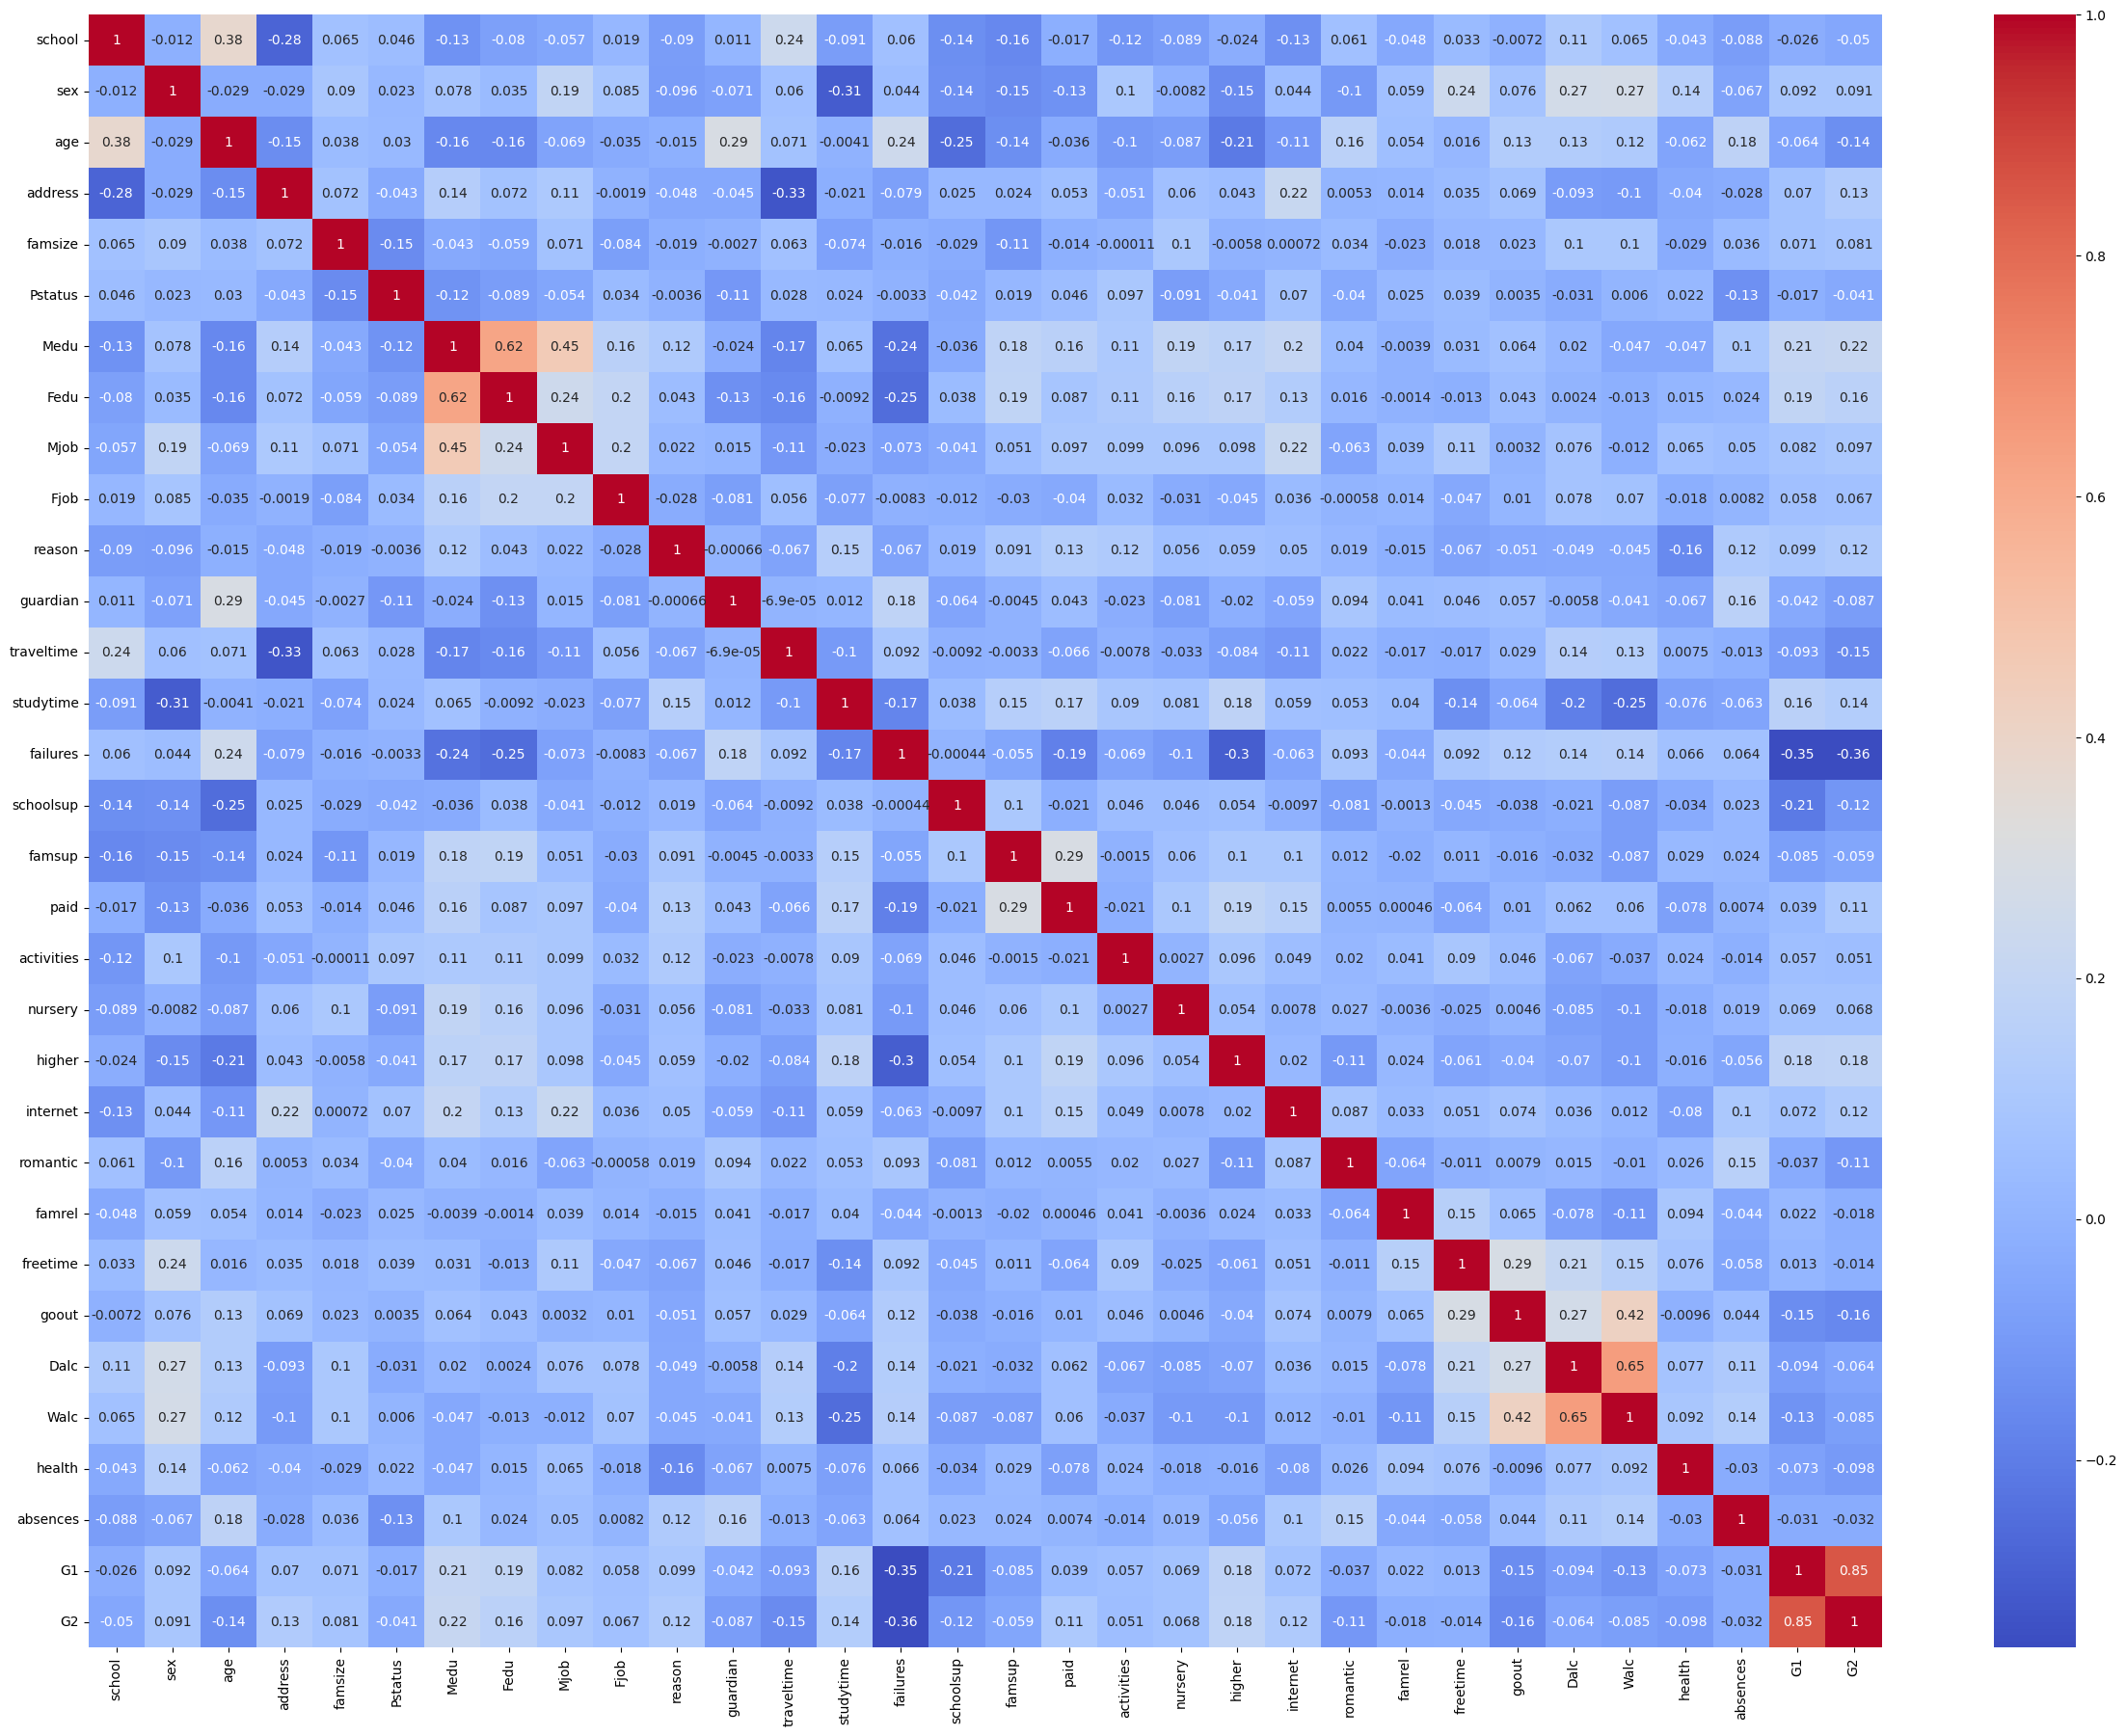

In [12]:
plt.figure(figsize=(30,22))
correlation_matrix = scaled_X.select_dtypes(include="number").corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Drop G1 and G2 as its highly correlated with eachother, and correlated with G3 as well

In [13]:
scaled_X.drop(['G1','G2'], axis=1, inplace=True)

# Split the data into training set and test set with 80%/20% scale

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.2, random_state=42)

# Import *RandomForestRegressor model*

In [15]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Determine the optimal hyperparameters for RandomForestRegressor with GridSearchCV. (*uncomment the code from lines 3 to 13 to execute GridSearchCV. Be aware that this process may take approximately 15 minutes to complete.*)

In [16]:
#Hyperparameter tuning

# from sklearn.model_selection import GridSearchCV


# param_grid = {
#     'n_estimators': [25, 50, 75, 100],
#     'random_state': [1, 42, 120, 1337]
# }

# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_absolute_error', n_jobs = -1, verbose = 1)

# grid_search.fit(x_train, y_train)

# Print the optimal hyperpamateres (*uncomment after finishing GridSearchCV*)

In [17]:
# print(grid_search.best_params_)

# Insert optimal hyperparameters into the model

In [18]:
model = RandomForestRegressor(n_estimators=75, random_state=1)

# Train the model with the training set, and check the score with the test set.

In [19]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model.score(x_test, y_test)

/tmp/ipykernel_20/2535004269.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


0.30877961776360796

# To determine the performance of the model, we can use the value of *Mean Absolute Error (MAE)*, a metric that measures average prediction error. Lower MAE values indicate better model accuracy.

In [20]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(mae)

2.9994936708860758


# The model have MAE value of ~3 (rounded)

Thank you for reading my code! I am aware it is far from perfect, and I will happily accepts any suggestions to improve its performance!